In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive


/content/drive/MyDrive


In [ ]:
!git clone https://github.com/aschultekroll/Heat-Equation-MPI.git

Cloning into 'Heat-Equation-MPI'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 27 (delta 6), reused 26 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 1.31 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
!pip install mpi4py


In [3]:
cd Heat-Equation-MPI


/content/drive/MyDrive/Heat-Equation-MPI


In [33]:
pwd


'/content/drive/MyDrive/Heat-Equation-MPI'

In [5]:
pr_ar = [1, 4, 9, 16, 25, 36]
# pr_ar = [1, 4]
# gh_s = [1, 2, 3, 5, 10, 13, 15]


for i in pr_ar:
  ! sudo mpirun --allow-run-as-root --oversubscribe -np {i} python3 mpi.py 100 1e-2 3 50 False

In [6]:
pr_ar = [1, 4, 9, 16, 25, 36]
# pr_ar = [1, 4]
# gh_s = [1, 2, 3, 5, 10, 13, 15]


for i in pr_ar:
  ! sudo mpirun --allow-run-as-root --oversubscribe -np {i} python3 mpi.py 500 1e-2 3 50 False

In [9]:

pr_ar = [1, 4, 9, 16, 25, 36]
# pr_ar = [1, 4]
# gh_s = [1, 2, 3, 5, 10, 13, 15]


for i in pr_ar:
  ! sudo mpirun --allow-run-as-root --oversubscribe -np {i} python3 mpi.py 1000 1e-2 3 50 False

In [15]:
import pandas as pd

df_ = pd.read_csv("time5.csv", header=None, usecols=[7])
df_1, df_2, df_3 = df_.to_numpy()[1:7], df_.to_numpy()[7:13], df_.to_numpy()[19:]


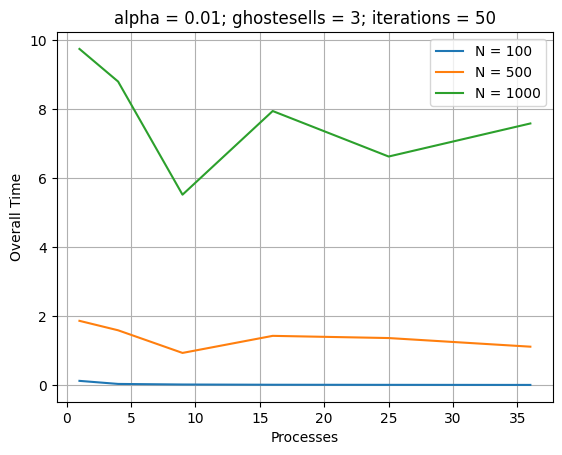

In [23]:
import matplotlib.pyplot as plt

plt.title('alpha = 0.01; ghostesells = 3; iterations = 50')
plt.plot(pr_ar, df_1, label='N = 100')
plt.plot(pr_ar, df_2, label='N = 500')
plt.plot(pr_ar, df_3, label='N = 1000')


plt.xlabel('Processes')
plt.ylabel('Overall Time');
plt.legend()
plt.grid()


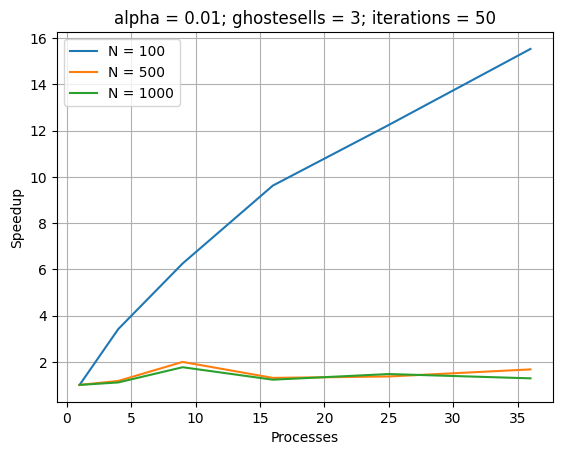

In [29]:
import matplotlib.pyplot as plt

plt.title('alpha = 0.01; ghostesells = 3; iterations = 50')
plt.plot(pr_ar, df_1[0] /  df_1 , label='N = 100')
plt.plot(pr_ar, df_2[0] / df_2, label='N = 500')
plt.plot(pr_ar, df_3[0] / df_3, label='N = 1000')


plt.xlabel('Processes')
plt.ylabel('Speedup');
plt.legend()
plt.grid()

In [34]:


# pr_ar = [1, 4, 9, 16, 25, 36]
# pr_ar = [1, 4]
gh_s = [1, 2, 3, 5, 10, 13, 15]


for i in gh_s:
  ! sudo mpirun --allow-run-as-root --oversubscribe -np 32 python3 mpi.py 1000 1e-2 {i} 50 False

In [41]:
df_ = pd.read_csv("time5.csv", header=None, usecols=[7])
df_1, df_2, df_3, df_4 = df_.to_numpy()[25:32], df_.to_numpy()[32:39], df_.to_numpy()[39:46], df_.to_numpy()[46:]

In [40]:

df_1

array([[ 4.08859062],
       [ 8.71010518],
       [18.12393332],
       [27.54803061],
       [36.69225526],
       [46.52077532],
       [ 1.79666853]])

In [42]:

df_1.shape, df_2.shape, df_3.shape, df_4.shape

((7, 1), (7, 1), (7, 1), (7, 1))

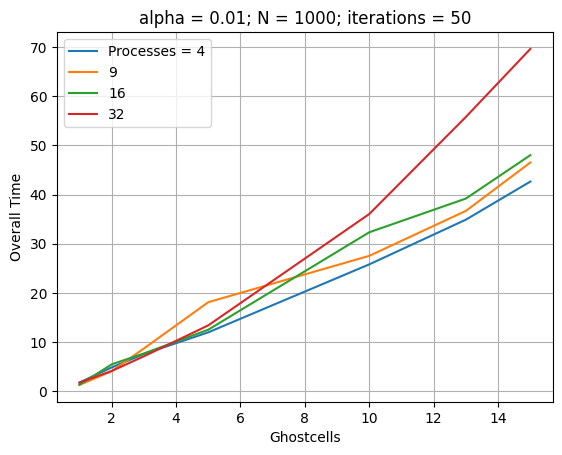

In [45]:

plt.title('alpha = 0.01; N = 1000; iterations = 50')
plt.plot(gh_s, df_2, label='Processes = 4')
plt.plot(gh_s, df_1, label='9')
plt.plot(gh_s, df_3, label='16')
plt.plot(gh_s, df_4, label='32')


plt.xlabel('Ghostcells')
plt.ylabel('Overall Time');
plt.legend()
plt.grid()

In [ ]:
import imageio.v3 as iio
import os
import glob

def create_gif_from_pngs(png_folder, gif_filename="output.gif", duration=5):
    """Creates a GIF from PNG images in a specified folder.

    Args:
        png_folder: Path to the folder containing PNG images.
        gif_filename: Filename for the output GIF (default: "output.gif").
        duration: Duration (in seconds) for each frame (default: 0.5).
    """
    png_files = sorted(glob.glob(os.path.join(png_folder, "*.png")))  #get all png files, sorted

    if not png_files:
        print(f"No PNG files found in {png_folder}")
        return

    images = []
    for filename in png_files:
        try:
            img = iio.imread(filename)
            images.append(img)
        except Exception as e:
            print(f"Error loading {filename}: {e}")
            # Choose how you want to handle errors: skip, exit, etc.
            # For this example, we'll skip the bad file.
            continue


    iio.imwrite(gif_filename, images, extension='.gif', fps=1/duration) #fps = frame per second
    print(f"GIF '{gif_filename}' created successfully.")

# Example usage:  Replace 'path/to/your/pngs' with the actual path
png_folder_path = "/content/drive/MyDrive/Heat-Equation-MPI/visualizations/60_10_50/" #<-- replace this
create_gif_from_pngs(png_folder_path, duration=0.2) #0.2 second per frame. Adjust as needed

GIF 'output.gif' created successfully.
